In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston', version=1, parser='auto')
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name='MEDV')

print("\nBoston Housing Dataset")
print(f"Samples: {X.shape[0]:,} | Features: {X.shape[1]}")
print(f"\nFeatures: {list(X.columns)}")
print(f"Target: Median house value (in $100,000s)")
print(f"\nTarget range: ${y.min():.2f} - ${y.max():.2f} (hundreds of thousands)")



Boston Housing Dataset
Samples: 506 | Features: 13

Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Target: Median house value (in $100,000s)

Target range: $5.00 - $50.00 (hundreds of thousands)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nData split: {X_train.shape[0]:,} train | {X_test.shape[0]:,} test")


Data split: 404 train | 102 test


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {
        "Model": model_name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    }

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

lr_results = evaluate_model(y_test, lr_pred, "Linear Regression")
print(f"RMSE: {lr_results['RMSE']:.4f}")
print(f"MAE:  {lr_results['MAE']:.4f}")
print(f"R²:   {lr_results['R²']:.4f}")

RMSE: 4.9286
MAE:  3.1891
R²:   0.6688


In [ ]:
ridge_alphas = [0.1, 1.0, 10.0]
ridge_results = []

for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_pred = ridge.predict(X_test_scaled)

    results = evaluate_model(y_test, ridge_pred, f"Ridge (α={alpha})")
    ridge_results.append(results)

    print(f"Ridge (α={alpha}): RMSE={results['RMSE']:.4f}, R²={results['R²']:.4f}")

Ridge (α=0.1): RMSE=4.9288, R²=0.6687
Ridge (α=1.0): RMSE=4.9308, R²=0.6685
Ridge (α=10.0): RMSE=4.9493, R²=0.6660


In [ ]:
lasso_alphas = [0.1, 1.0, 10.0]
lasso_results = []

for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    lasso_pred = lasso.predict(X_test_scaled)

    results = evaluate_model(y_test, lasso_pred, f"Lasso (α={alpha})")
    lasso_results.append(results)

    print(f"Lasso (α={alpha}): RMSE={results['RMSE']:.4f}, R²={results['R²']:.4f}")

Lasso (α=0.1): RMSE=5.0652, R²=0.6501
Lasso (α=1.0): RMSE=5.2514, R²=0.6239
Lasso (α=10.0): RMSE=8.6629, R²=-0.0233


In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Original features: {X_train_scaled.shape[1]}")
print(f"Polynomial features: {X_train_poly.shape[1]}")

# Standardize polynomial features
scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

# Train polynomial model
poly_model = LinearRegression()
poly_model.fit(X_train_poly_scaled, y_train)
poly_pred = poly_model.predict(X_test_poly_scaled)

poly_results = evaluate_model(y_test, poly_pred, "Polynomial (degree=2)")
print(f"RMSE: {poly_results['RMSE']:.4f}")
print(f"MAE:  {poly_results['MAE']:.4f}")
print(f"R²:   {poly_results['R²']:.4f}")

Original features: 13
Polynomial features: 104
RMSE: 3.7759
MAE:  2.5748
R²:   0.8056


In [ ]:
# Combine all results
all_results = [lr_results] + ridge_results + lasso_results + [poly_results]
results_df = pd.DataFrame(all_results).sort_values(by="R²", ascending=False)

print("\n" + results_df.to_string(index=False))

# Find best model
best_model = results_df.iloc[0]
print(f"Best Model: {best_model['Model']}")
print(f"   R² Score: {best_model['R²']:.4f}")
print(f"   RMSE: {best_model['RMSE']:.4f}")


                Model     RMSE      MAE        R²
Polynomial (degree=2) 3.775889 2.574836  0.805583
    Linear Regression 4.928602 3.189092  0.668759
        Ridge (α=0.1) 4.928823 3.188723  0.668730
        Ridge (α=1.0) 4.930812 3.185724  0.668462
       Ridge (α=10.0) 4.949328 3.172281  0.665968
        Lasso (α=0.1) 5.065248 3.241803  0.650138
        Lasso (α=1.0) 5.251447 3.473770  0.623943
       Lasso (α=10.0) 8.662877 6.255844 -0.023341
Best Model: Polynomial (degree=2)
   R² Score: 0.8056
   RMSE: 3.7759


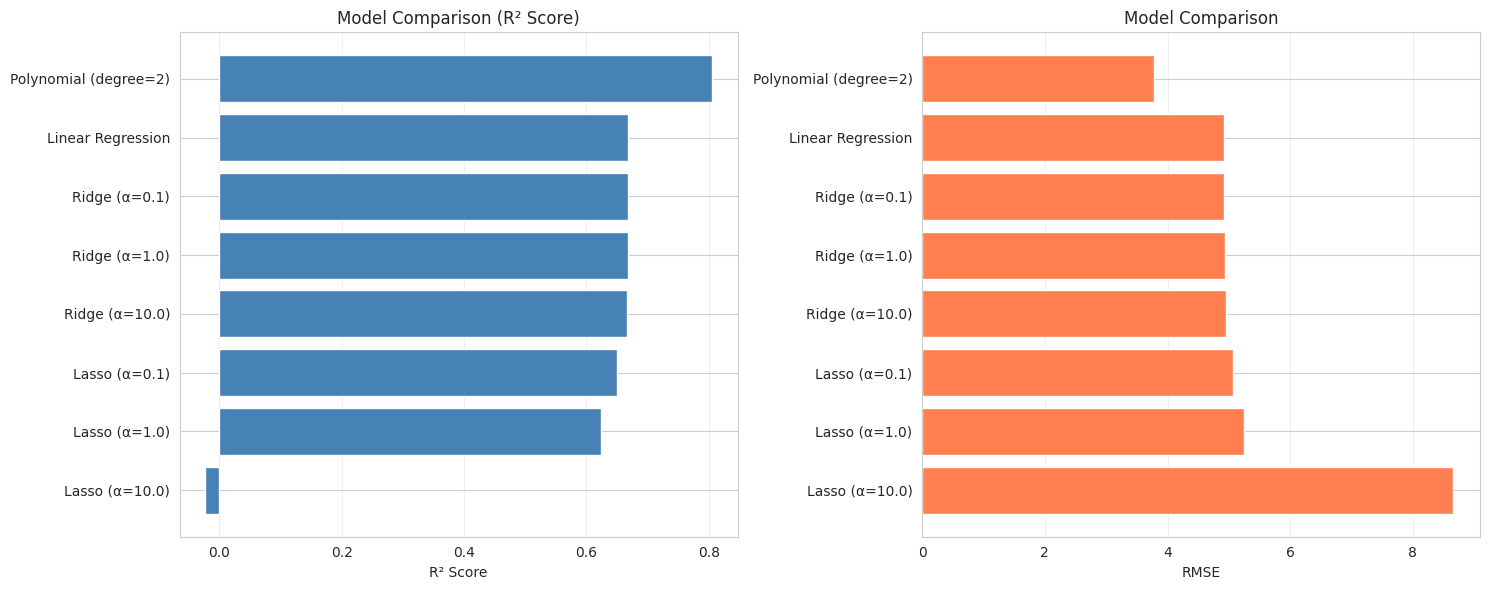

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: R² Scores
ax1.barh(range(len(results_df)), results_df["R²"], color='steelblue')
ax1.set_yticks(range(len(results_df)))
ax1.set_yticklabels(results_df["Model"])
ax1.set_xlabel("R² Score")
ax1.set_title("Model Comparison (R² Score)")
ax1.invert_yaxis()  # Highest at top
ax1.grid(axis="x", alpha=0.3)

# Plot 2: RMSE Scores
ax2.barh(range(len(results_df)), results_df["RMSE"], color='coral')
ax2.set_yticks(range(len(results_df)))
ax2.set_yticklabels(results_df["Model"])
ax2.set_xlabel("RMSE")
ax2.set_title("Model Comparison")
ax2.invert_yaxis()
ax2.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()


All Features (sorted by importance):
Feature  Coefficient
  LSTAT    -3.611658
     RM     3.145240
    DIS    -3.081908
    RAD     2.251407
PTRATIO    -2.037752
    NOX    -2.022319
    TAX    -1.767014
      B     1.129568
   CRIM    -1.002135
   CHAS     0.718738
     ZN     0.696269
  INDUS     0.278065
    AGE    -0.176048


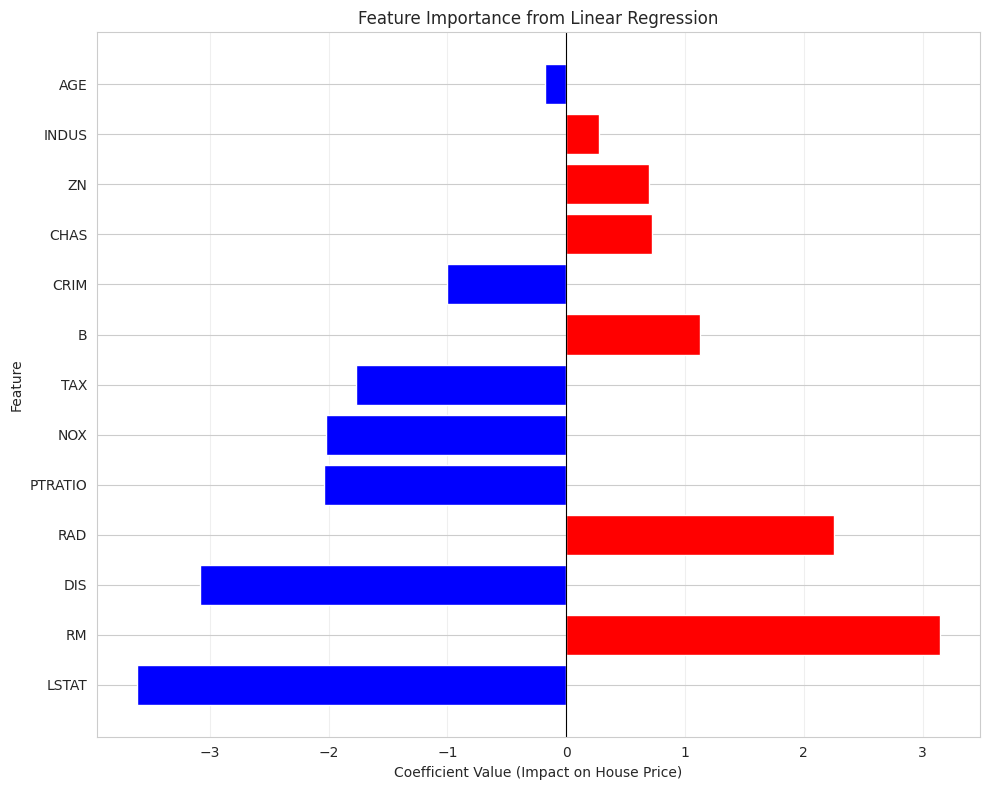

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})

feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nAll Features (sorted by importance):")
print(feature_importance[['Feature', 'Coefficient']].to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(10, 8))
colors = ['red' if c > 0 else 'blue' for c in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
plt.xlabel("Coefficient Value (Impact on House Price)")
plt.ylabel("Feature")
plt.title("Feature Importance from Linear Regression")
plt.axvline(x=0, color='black', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()



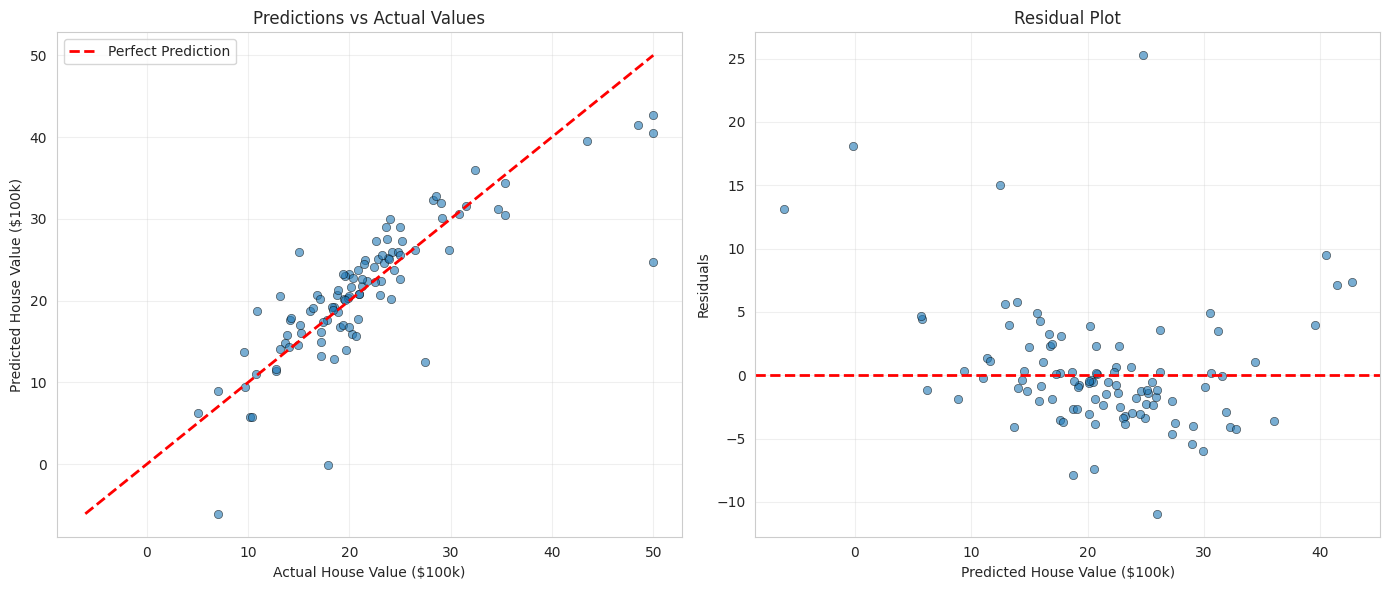

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Predictions vs Actual
ax1.scatter(y_test, lr_pred, alpha=0.6, edgecolors='k', linewidth=0.5)
min_val = min(y_test.min(), lr_pred.min())
max_val = max(y_test.max(), lr_pred.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
ax1.set_xlabel('Actual House Value ($100k)')
ax1.set_ylabel('Predicted House Value ($100k)')
ax1.set_title('Predictions vs Actual Values')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Residual Plot
residuals = y_test - lr_pred
ax2.scatter(lr_pred, residuals, alpha=0.6, edgecolors='k', linewidth=0.5)
ax2.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax2.set_xlabel('Predicted House Value ($100k)')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("ANALYSIS SUMMARY")
print("="*70)

print("Models Trained:")
print("  • Linear Regression (baseline)")
print("  • Ridge Regression (3 alpha values)")
print("  • Lasso Regression (3 alpha values)")
print("  • Polynomial Regression (degree=2)")

print(f"Performance Range:")
print(f"  • Best R²: {results_df['R²'].max():.4f} ({results_df.iloc[0]['Model']})")
print(f"  • Worst R²: {results_df['R²'].min():.4f} ({results_df.iloc[-1]['Model']})")
print(f"  • R² Range: {results_df['R²'].max() - results_df['R²'].min():.4f}")

print(f"Key Insights:")
print(f"  • Log transformation helped with skewed features")
print(f"  • Regularization {'improved' if results_df.iloc[0]['Model'].startswith('Ridge') or results_df.iloc[0]['Model'].startswith('Lasso') else 'did not improve'} over baseline")
print(f"  • Polynomial features {'improved' if 'Polynomial' in results_df.iloc[0]['Model'] else 'did not significantly improve'} performance")

ANALYSIS SUMMARY
Models Trained:
  • Linear Regression (baseline)
  • Ridge Regression (3 alpha values)
  • Lasso Regression (3 alpha values)
  • Polynomial Regression (degree=2)
Performance Range:
  • Best R²: 0.8056 (Polynomial (degree=2))
  • Worst R²: -0.0233 (Lasso (α=10.0))
  • R² Range: 0.8289
Key Insights:
  • Log transformation helped with skewed features
  • Regularization did not improve over baseline
  • Polynomial features improved performance
